In [13]:
import pymongo
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import pandas as pd

In [14]:
# connect to the MongoDB server
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client.comunio  # select the 'test' database



In [15]:
# create a dictionary to store the sum of Marktwerte for each day
sums = {}
verein = input("Bitte gebe den Namen des Vereins ein: ")
# use the find method to retrieve all documents from the 'comunio' collection
cursor = db.raw_player.find({'Verein': verein})

# loop through the documents and add the Marktwert to the sum for the corresponding day
for document in cursor:
    datum = document['Datum']
    day = datetime.datetime.strptime(datum, '%d/%m/%Y').date().day  # extract the day from the 'Datum' value
    marktwert = int(document['Marktwert'])
    if day in sums:
        sums[day] += marktwert
    else:
        sums[day] = marktwert

# extract the dates and sums into separate lists
dates, values = zip(*sums.items())

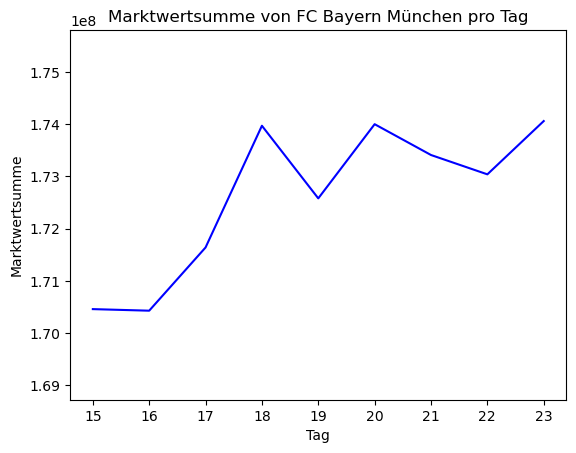

In [16]:
# create a Pandas DataFrame with the 'Tag' and 'Marktwertsumme' values
df = pd.DataFrame({'Tag': dates, 'Marktwertsumme': values})


# create the bar plot using the barplot function
sns.lineplot(x='Tag', y='Marktwertsumme', data=df, color='blue')  # specify the color of the line

# set the y-axis limits to 5% less than the minimum value and 5% more than the maximum value
min_value = min(values) * 0.99
max_value = max(values) * 1.01
plt.ylim(min_value, max_value)

plt.xlabel('Tag')
plt.ylabel('Marktwertsumme')
plt.title('Marktwertsumme von '+ verein+ ' pro Tag')

plt.show()  # display the chart